<a href="https://colab.research.google.com/github/ecmatz/Kmeans_Clustering/blob/main/CS470Assignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#mounting drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import statistics as stats

In [ ]:
#setting local path
import os
os.getcwd()
os.chdir("drive/MyDrive/Colab_Notebooks/Assignment1")

In [ ]:
from numpy.random.mtrand import RandomState
#random initialization of clusters
def randomInit(data, numClusters):
  random_state = np.random.randint(1000000)
  np.random.seed(random_state)
  centroids = []
  n = np.shape(data)[0]

  for _ in range(numClusters):
    i = np.random.randint(0,n-1)
    centroids.append(data[i])
  return np.array(centroids)

In [ ]:
#assigning each value in data set to closest centroid
def assignCentroids(data,centroids):
  closestCentroids = []
  for x in data:
    distancesFromX = []
    for y in centroids:
      distancesFromX.append(math.dist(x,y))
    nearestCentroid = distancesFromX.index(min(distancesFromX))
    closestCentroids.append(nearestCentroid)
  return closestCentroids


In [ ]:
#function for recalculating centroids
def recalculateCentroids(data, closestCentroids, numClusters):
  clusters = []
  means = []
  (xs,ys) = np.hsplit(data,2)
  for i, centroid in enumerate(closestCentroids):
    clusters.append(((xs[i])[0],(ys[i])[0],centroid))

  for n in range(0,numClusters):
    pointsForCluster = []
    for triple in clusters:
      if triple[2] == n:
          pointsForCluster.append((triple[0],triple[1]))
    sumx = 0
    sumy = 0
    total = len(pointsForCluster)
    for (x,y) in pointsForCluster:
      sumx+=x
      sumy+=y
    means.append((((sumx/total),(sumy/total))))
  return means

In [ ]:
def checkSimilarityToPrev(oldCentroids, newCentroids):
  disparity = 0;
  (ox,oy) = zip(*oldCentroids)
  (nx,ny) = zip(*newCentroids)
  for i in range(0,len(oldCentroids)):
    disparity+=abs(nx[i]-ox[i])
    disparity+=abs(ny[i]-oy[i])
  if(disparity < .01):
    return True
  else:
    return False



Ran for 19 Iterations.


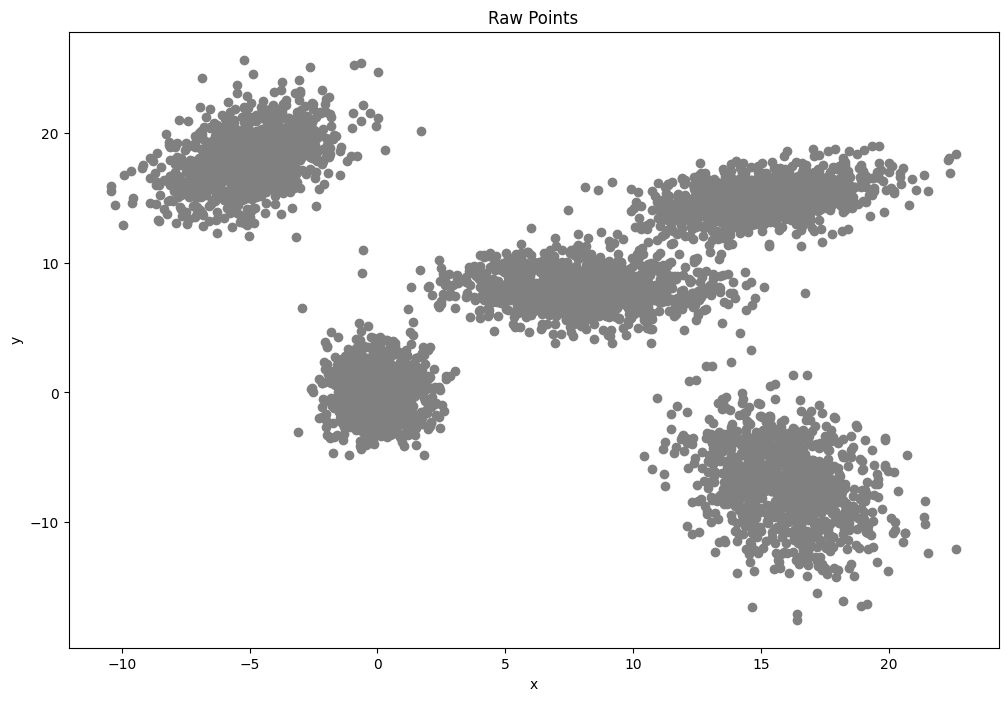

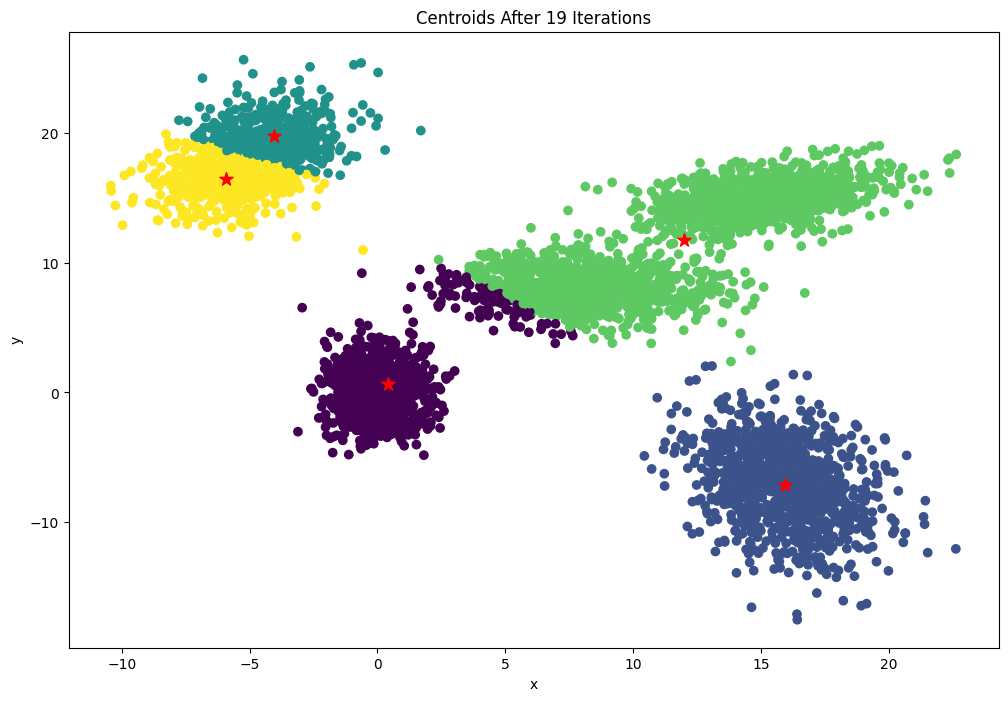

In [ ]:
#defining main function
def kmeans_fall2023(data, numClusters):
  #importing data as one numpy array
  data = np.loadtxt(data)
  #importing data from data.txt as xs and ys
  (xs,ys) = np.hsplit(data,2)
  #creating scatterplot for raw data
  fig = plt.figure(figsize=(12,8))
  plt.scatter(xs,ys, c = 'gray')
  plt.xlabel('x')
  plt.ylabel('y')
  plt.title('Raw Points')
  plt.show
  #call centroid inititalization function
  randomCentroids = randomInit(data, numClusters)
  #assign points to nearest centroid
  closestCentroids = assignCentroids(data,randomCentroids)
  #checking for data loss
  if len(data) != len(closestCentroids):
    print("ERROR 272 : FAILED TO ASSIGN A CLOSEST CENTROID TO EVERY POINT OF DATA")
    return -1

  count = 0
  stop = False
  while count < 1000 and stop == False:
    #Re-calculating centroid locations
    if count > 1:
      oldCentroids = newCentroids
    newCentroids = recalculateCentroids(data, closestCentroids, numClusters)
    if count > 1:
      stop = checkSimilarityToPrev(oldCentroids,newCentroids)
    #assigning points to new centroids
    closestCentroids = assignCentroids(data, newCentroids)
    count+=1

  #creating scatterplot with clustered data and centroids marked
  (x,y) = zip(*newCentroids)
  fig2 = plt.figure(figsize=(12,8))
  plt.xlabel('x')
  plt.ylabel('y')
  plt.title('Centroids After ' + str(count) + ' Iterations')
  plt.scatter(xs,ys,c = closestCentroids, cmap ='viridis')
  plt.scatter(x,y, c = 'red', marker = '*', s = 100)
  print("Ran for " + str(count) + " Iterations.")
kmeans_fall2023('data.txt', 5)